In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [2]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [3]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

/var/folders/q3/zw37twcs0938w_n3bzj65f9m0000gn/T/ipykernel_76985/4162933600.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(300,700))
/var/folders/q3/zw37twcs0938w_n3bzj65f9m0000gn/T/ipykernel_76985/4162933600.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(100,300))
/var/folders/q3/zw37twcs0938w_n3bzj65f9m0000gn/T/ipykernel_76985/4162933600.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])


In [6]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values

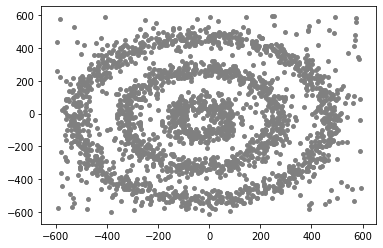

In [8]:
plt.scatter(x, y, s=15,color='grey')

In [10]:
from sklearn.cluster import DBSCAN

In [11]:
dbscan=DBSCAN()

In [12]:
dbscan.fit(df[[0,1]])

DBSCAN()

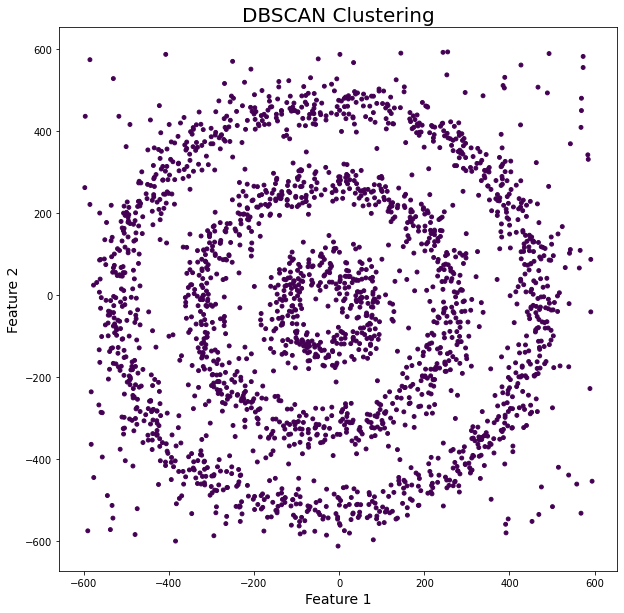

In [16]:
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [18]:
# lets get the distance from a point to its nearest data point
# considering all points
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)

In [19]:
nbrs = neigh.fit(df[[0,1]])

In [20]:
distances, indices = nbrs.kneighbors(df[[0,1]])

In [21]:
distances

array([[ 0.        ,  6.91861074],
       [ 0.        , 10.80836526],
       [ 0.        ,  7.56030267],
       ...,
       [ 0.        , 25.77071121],
       [ 0.        , 23.34523506],
       [ 0.        , 37.73592453]])

In [22]:
indices

array([[   0,  993],
       [   1, 2237],
       [   2,    5],
       ...,
       [2297,  210],
       [2298, 2139],
       [2299, 2059]])

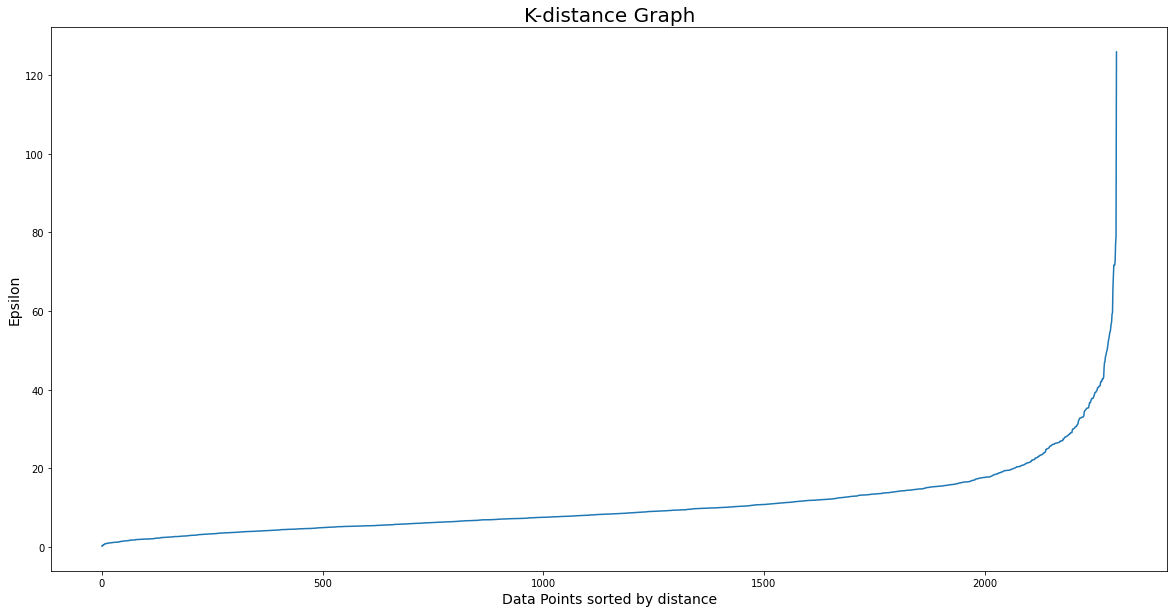

In [23]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [24]:
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [29]:
np.unique(dbscan_opt.labels_)

array([-1,  0,  1,  2])

In [27]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

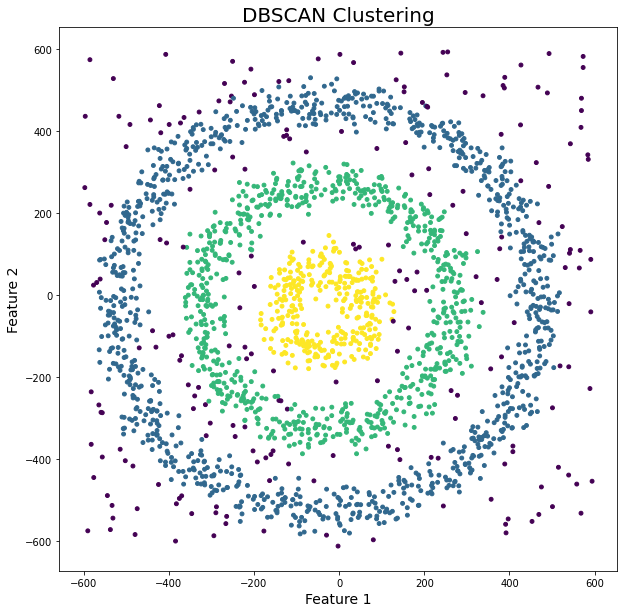

In [30]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()